# Install module

In [16]:
pip install --upgrade diffusers transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.0 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: transformers
    Found existing installation: transformers 4.23.1
    Uninstalling transformers-4.23.1:
      Successfully uninstalled transformers-4.23.1
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.7.2
    Uninstalling diffusers-0.7.2:
      Successfully uninstalled diffusers-0.7.2
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 8.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Load module

In [1]:
from transformers import MT5ForConditionalGeneration, T5Tokenizer
import torch
from diffusers import StableDiffusionPipeline

2022-12-17 15:07:55.650189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 15:07:55.994442: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-17 15:07:56.741355: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64::/usr/local/cuda/lib64:
2022-12-17 15:07:56.741435: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror:

## Load stable diffuser

In [4]:
# model_id = "CompVis/stable-diffusion-v1-4"
# device = "cpu"


# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16")
#pipe = pipe.to(device)
pipe = torch.load('/home/as9786/stable_diffuser.pth')
pipe = pipe.to('cuda')

## Load translator model

In [5]:
tokenizer = T5Tokenizer.from_pretrained('google/mt5-base')
#model = MT5ForConditionalGeneration.from_pretrained('MrBananaHuman/ko_en_translator')
model = torch.load('/home/as9786/ko2en.pth')
model.to('cuda')

tokenizer.add_special_tokens({'additional_special_tokens':['<sep>']})

1

In [6]:
def ko_en_translation(inp_ids, attn_mask):
    output = model.generate(input_ids=inp_ids.to(device),
                                       attention_mask=attn_mask.to(device),
                                       do_sample=True,
                                       max_length=128,
                                       early_stopping=True,
                                       num_beams=20,
                                       num_return_sequences=1,
                                       min_length=1,
                                       temperature=1,
                                       repetition_penalty=1.2,
                                       )
    korean =  tokenizer.decode(output[0], skip_special_tokens=True,clean_up_tokenization_spaces=True)
    return korean.strip()

In [7]:
def text2image(sent):

    input_sents = [sent]

    encoding = tokenizer.encode_plus('translate Korean to English: ' + "<sep>".join(input_sents), return_tensors="pt")
    input_ids, attention_masks = encoding["input_ids"], encoding["attention_mask"]
    output = ko_en_translation(input_ids, attention_masks)

    prompt = output
    image = pipe(prompt).images[0] 
    return image

In [9]:
device = 'cuda'

  0%|          | 0/51 [00:00<?, ?it/s]

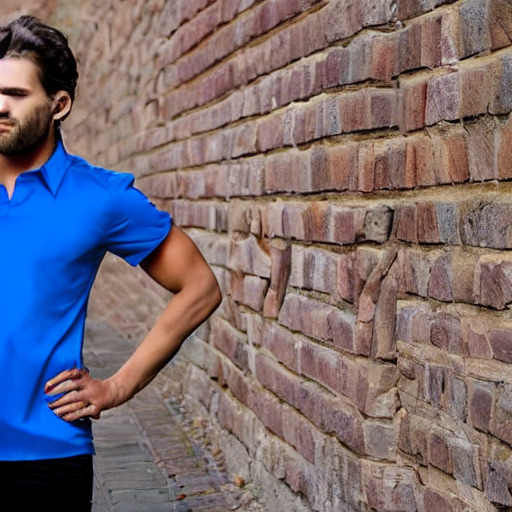

In [16]:
text2image('파란색 셔츠')

In [9]:
torch.save(pipe,'stable_diffuser.pth')
torch.save(model,'ko2en.pth')